In [1]:
import json
import yaml

import numpy as np
import pylab as plt

from pathlib import Path
import os

In [2]:
model_names = ['resnet10', 'resnet18', 'resnet34', 'resnet50']
queries = ['random', 'coreset', 'margin', 'badge', 'typiclust']
Q = {'random':'Random', 'coreset':'CoreSets', 'badge':'Badge', 'margin':'Margin', 'typiclust':'TypiClust'}
M = {'resnet10':'ResNet-10', 'resnet18':'ResNet-18', 'resnet34':'ResNet-34', 'resnet50':'ResNet-50'}

results = {mn:{
    q:{} for q in queries
} for mn in model_names}
root_path = Path('/home/phahn/repositories/SDAL/notebooks/data/dal2/')

for mn in model_names:
    for q in queries:
        if not (mn == 'resnet50' and q == 'badge'):
            paths = sorted(list(root_path.glob(mn+"/"+q+"/*")))
            for path in paths:
                print(path)
                if os.path.exists(path):
                    with open(path / 'results.json', 'r') as f:
                        run_results = json.load(f)
                    with open(path / '.hydra/config.yaml') as g:
                        conf = yaml.load(g, Loader=yaml.FullLoader)

                    results[mn][q][path.stem[-1]] = {'results': run_results, 'args': conf}

/home/phahn/repositories/SDAL/notebooks/data/dal2/resnet10/random/seed_1
/home/phahn/repositories/SDAL/notebooks/data/dal2/resnet10/random/seed_2
/home/phahn/repositories/SDAL/notebooks/data/dal2/resnet10/random/seed_3
/home/phahn/repositories/SDAL/notebooks/data/dal2/resnet10/coreset/seed_1
/home/phahn/repositories/SDAL/notebooks/data/dal2/resnet10/coreset/seed_2
/home/phahn/repositories/SDAL/notebooks/data/dal2/resnet10/coreset/seed_3
/home/phahn/repositories/SDAL/notebooks/data/dal2/resnet10/margin/seed_1
/home/phahn/repositories/SDAL/notebooks/data/dal2/resnet10/margin/seed_2
/home/phahn/repositories/SDAL/notebooks/data/dal2/resnet10/margin/seed_3
/home/phahn/repositories/SDAL/notebooks/data/dal2/resnet10/badge/seed_1
/home/phahn/repositories/SDAL/notebooks/data/dal2/resnet10/badge/seed_2
/home/phahn/repositories/SDAL/notebooks/data/dal2/resnet10/badge/seed_3
/home/phahn/repositories/SDAL/notebooks/data/dal2/resnet10/typiclust/seed_1
/home/phahn/repositories/SDAL/notebooks/data/dal

In [3]:
results['resnet10']['random']['1']['results'][0]['test_stats']['acc1']

35.349998474121094

resnet50 badge


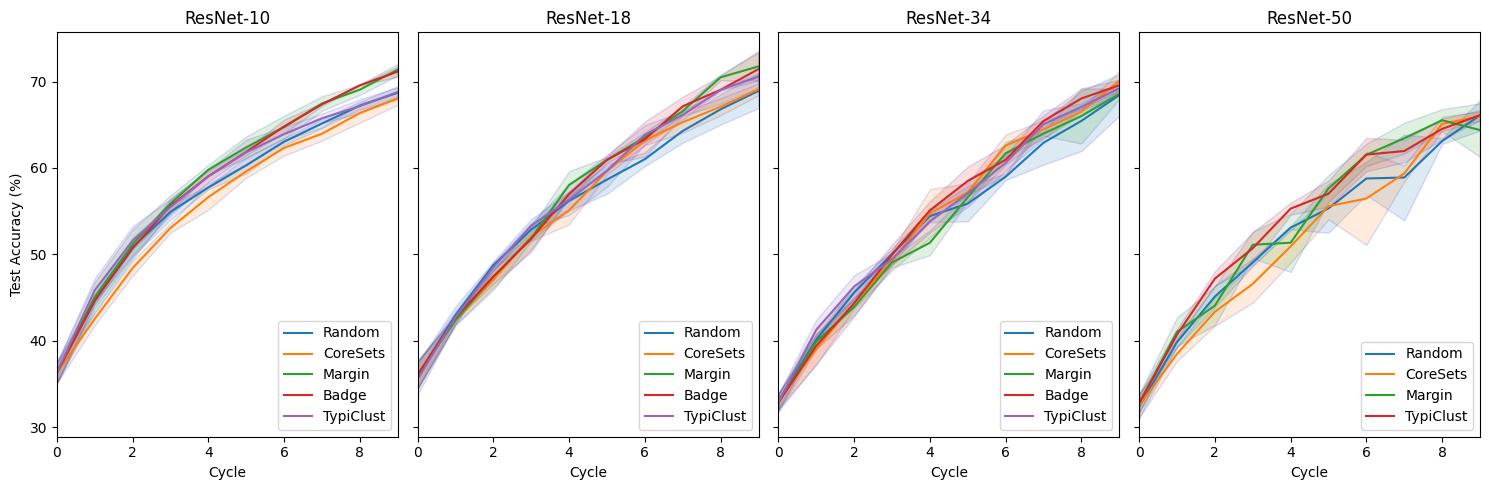

In [4]:
fig, axis = plt.subplots(nrows=1, ncols=4, figsize=(15, 5), tight_layout=True, sharex=True, sharey=True)

for i, mn in enumerate(model_names):
    for q in queries:
        values = []
        for _, res in results[mn][q].items():
            values.append([h['test_stats']['acc1'] for h in res['results']])

        if len(values) == 0:
            print(mn, q)
        else:
            mean = np.mean(values, axis=0)
            std = np.std(values, axis=0)

            axis[i].plot(mean, label=Q[q])
            axis[i].fill_between(
                x=[j for j in range(len(mean))], 
                y1=mean+std, 
                y2=mean-std,
                alpha=0.15,
                edgecolor='#1B2ACC', 
                )
            lgd = axis[i].legend(loc='lower right')
            axis[i].set_xlim(0, len(mean)-1)
            if i//2 == 1:
                axis[i].set_xlabel('cycle')
            axis[i].set_title(M[mn])
            if i == 0:
                axis[i].set_ylabel("Test Accuracy (%)")
            axis[i].set_xlabel('Cycle')
plt.show()

resnet50 badge


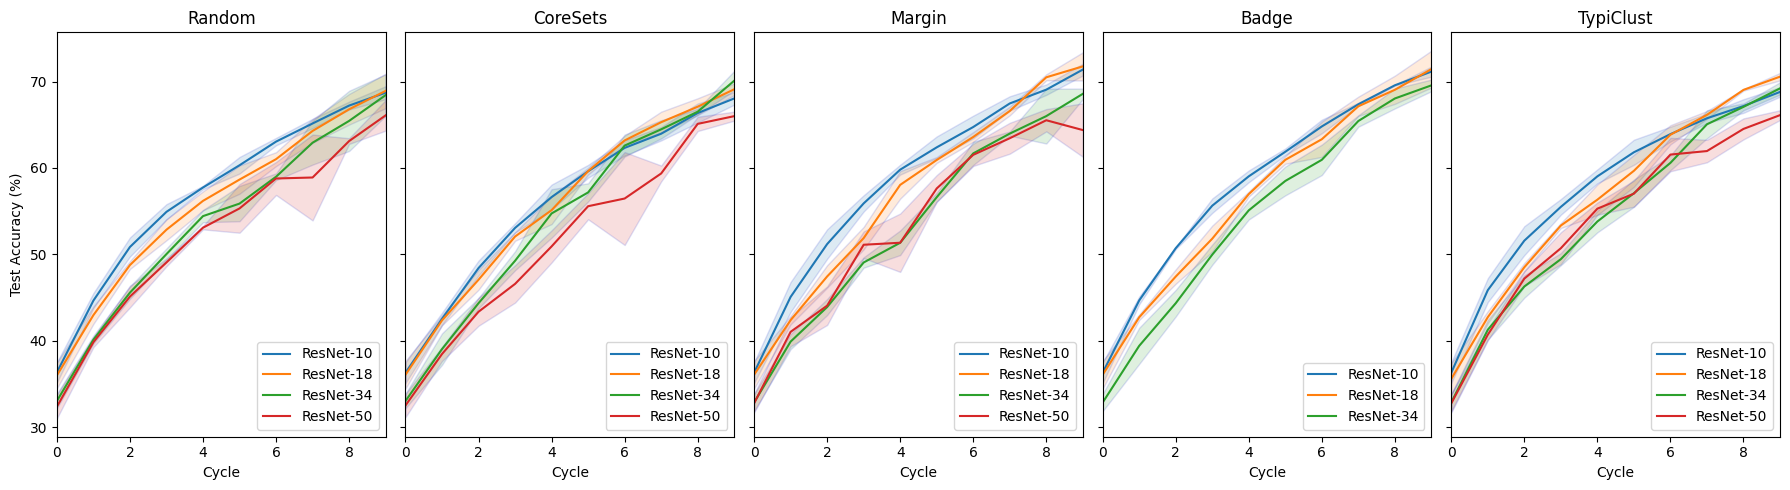

In [5]:
fig, axis = plt.subplots(nrows=1, ncols=5, figsize=(18, 5), tight_layout=True, sharex=True, sharey=True)

for i, q in enumerate(queries):
    for mn in model_names:
        values = []
        for _, res in results[mn][q].items():
            values.append([h['test_stats']['acc1'] for h in res['results']])

        if len(values) == 0:
            print(mn, q)
        else:
            mean = np.mean(values, axis=0)
            std = np.std(values, axis=0)

            axis[i].plot(mean, label=M[mn])
            axis[i].fill_between(
                x=[j for j in range(len(mean))], 
                y1=mean+std, 
                y2=mean-std,
                alpha=0.15,
                edgecolor='#1B2ACC', 
                )
            lgd = axis[i].legend(loc='lower right')
            axis[i].set_xlim(0, len(mean)-1)
            if i//2 == 1:
                axis[i].set_xlabel('cycle')
            axis[i].set_title(Q[q])
            if i == 0:
                axis[i].set_ylabel("Test Accuracy (%)")
            axis[i].set_xlabel('Cycle')
plt.show()